### We want to discover the possibilities of uncovering possible etfs with underlying such as  Coffee and Copper

Following the historicals of Lithium, it has not been bearish since 2023

In [73]:
!pip install prophet scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [74]:
!pip install hmmlearn 

Defaulting to user installation because normal site-packages is not writeable


In [87]:
!pip install pykalman

Defaulting to user installation because normal site-packages is not writeable


In [90]:
!pip install --upgrade Cython

Defaulting to user installation because normal site-packages is not writeable
  Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable


In [92]:
!pip install fbprophet
!pip install prophet


Defaulting to user installation because normal site-packages is not writeable
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.1.6-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [70 lines of output]
      C:\Users\reflectorm\AppData\Local\Temp\pip-install-gn594ip4\fbprophet_96f2946c4b344caf980e61b452b0db1b\setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import (
      C:\Users\reflectorm\AppData\Local\Temp\pip-install-gn594ip4\fbprophet_96f2946c4b344caf980e61b452b0db1b\setup.py:19: SetuptoolsDeprecationWarning: The test command is disabled and references to it are deprecated.
      !!
      
              ********************************************************************************
              Please remove any references to `setuptools.command.test` in all supported versions of the affected package.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid 

Defaulting to user installation because normal site-packages is not writeable


In [19]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import tradingeconomics as te

In [22]:
import yfinance as yf
import pandas as pd

# Tickers for Coffee and Copper Futures
tickers = {
    'Coffee': 'KC=F',  # Coffee (ICE)
    'Copper': 'HG=F'   # Copper(COMEX)
}

# Download data from Yahoo Finance
df = yf.download(list(tickers.values()), period="10y", interval="1d")['Close']

# Rename columns to match commodities
df.columns = tickers.keys()

# Reset index to include Date as a column
df.reset_index(inplace=True)

# Convert Date to DD/MM/YYYY format
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

# Display DataFrame
print(df.head())


[*********************100%***********************]  2 of 2 completed

         Date  Coffee      Copper
0  02/09/2015  2.5990  167.600006
1  02/10/2015  2.5625  159.399994
2  02/11/2015  2.5525  159.449997
3  02/12/2015  2.6090  164.550003
4  02/13/2015  2.6135  163.199997


In [31]:
df[['Coffee', 'Copper']] = df[['Coffee', 'Copper']].ffill()

In [33]:
df.isnull().sum()

Date      0
Coffee    0
Copper    0
dtype: int64

#### Exploratory Data Analysis

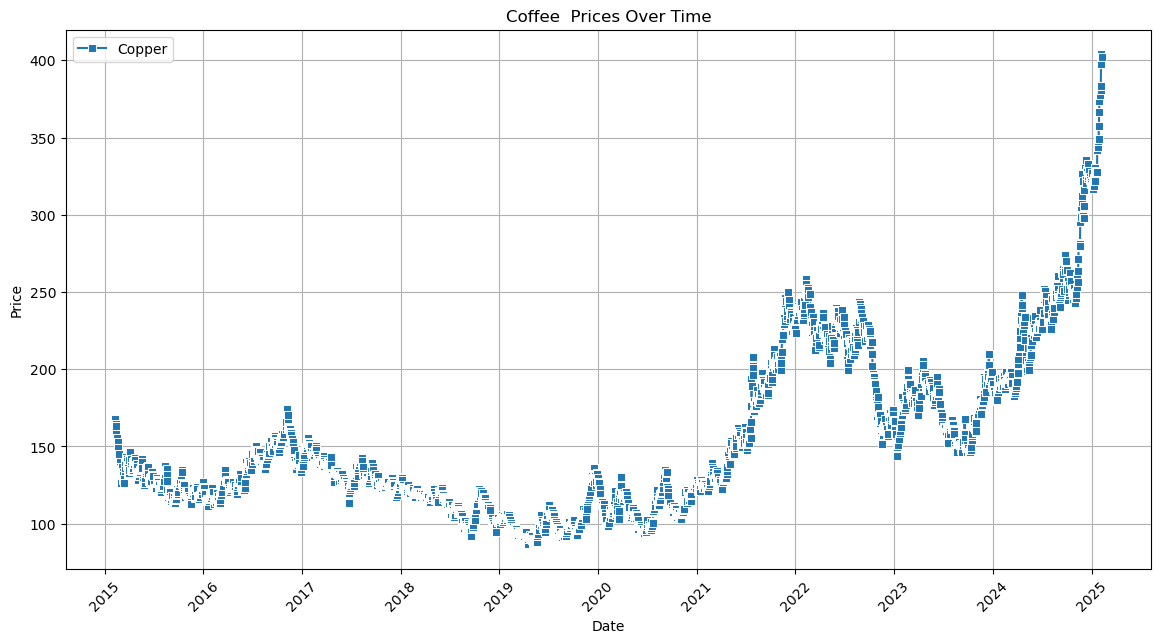

In [36]:
# Convert Date column to datetime (important for plotting)
df['Date'] = pd.to_datetime(df['Date'])

# Set the figure size
plt.figure(figsize=(14, 7))

# Plot the data
sns.lineplot(data=df, x='Date', y='Copper', label='Copper', marker='s')

# Set the title and labels
plt.title('Coffee  Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)  # Adds a grid for better visualization
plt.show()

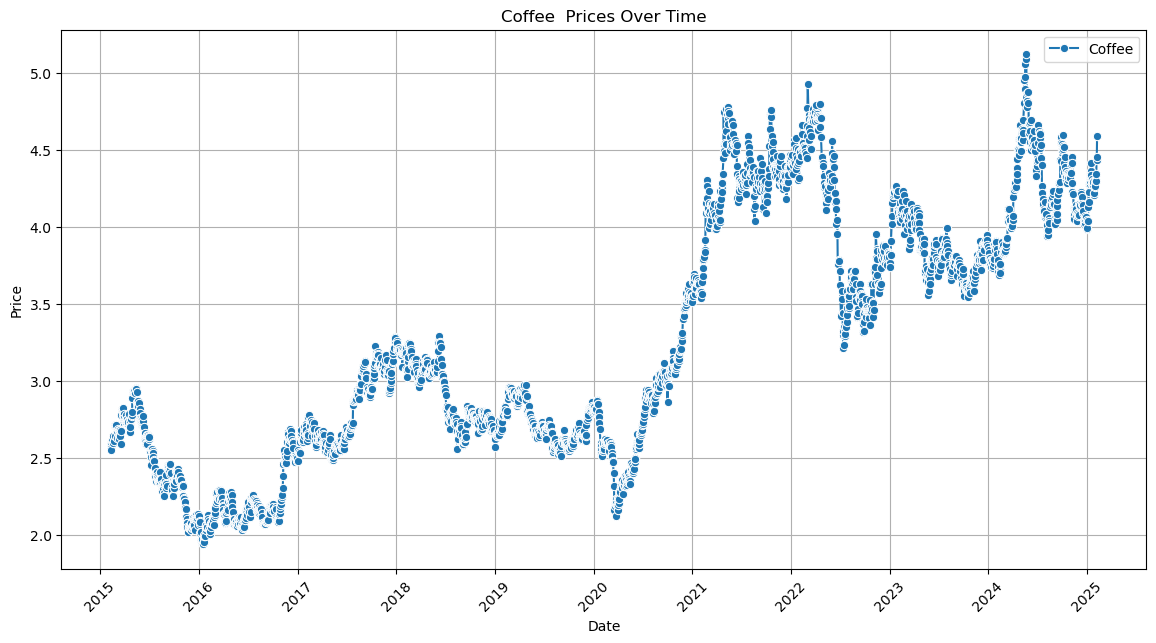

In [34]:
# Convert Date column to datetime (important for plotting)
df['Date'] = pd.to_datetime(df['Date'])

# Set the figure size
plt.figure(figsize=(14, 7))

# Plot the data
sns.lineplot(data=df, x='Date', y='Coffee', label='Coffee', marker='o')

# Set the title and labels
plt.title('Coffee  Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)  # Adds a grid for better visualization
plt.show()

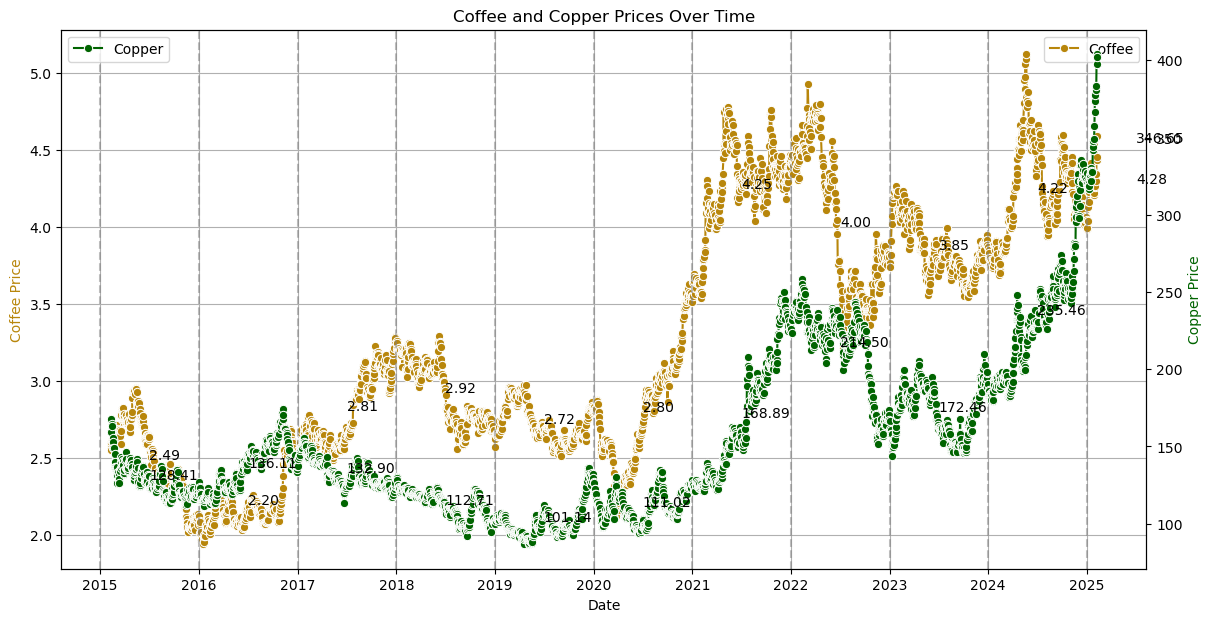

In [42]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Coffee Prices on the primary y-axis
sns.lineplot(data=df, x='Date', y='Coffee', ax=ax1, label='Coffee', marker='o', color='darkgoldenrod')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Copper Prices on the secondary y-axis
sns.lineplot(data=df, x='Date', y='Copper', ax=ax2, label='Copper', marker='o', color='darkgreen')

# Set labels
ax1.set_xlabel('Date')
ax1.set_ylabel('Coffee Price', color='darkgoldenrod')
ax2.set_ylabel('Copper Price', color='darkgreen')

# Set the title
plt.title('Coffee and Copper Prices Over Time')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a grid
ax1.grid(True)

# Show mean bars every year
df['Year'] = df['Date'].dt.year
yearly_means = df.groupby('Year')[['Coffee', 'Copper']].mean()

for year, row in yearly_means.iterrows():
    ax1.axvline(pd.Timestamp(str(year) + "-01-01"), color='gray', linestyle="--", alpha=0.5)
    ax1.text(pd.Timestamp(str(year) + "-07-01"), row['Coffee'], f"{row['Coffee']:.2f}", color='black')
    ax2.text(pd.Timestamp(str(year) + "-07-01"), row['Copper'], f"{row['Copper']:.2f}", color='black')

# Show the plot
plt.show()


In [60]:
# dropping the year column
df.drop('Year', axis=1, inplace=True)

In [61]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                                 Date       Coffee       Copper
count                           2517  2517.000000  2517.000000
mean   2020-02-09 00:50:55.065554176     3.245847   153.667382
min              2015-02-09 00:00:00     1.939500    86.650002
25%              2017-08-10 00:00:00     2.625000   117.500000
50%              2020-02-11 00:00:00     3.042500   134.649994
75%              2022-08-10 00:00:00     3.983500   185.000000
max              2025-02-07 00:00:00     5.119000   403.950012
std                              NaN     0.784433    52.126287


In [62]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])
df_returns = numeric_cols.pct_change().dropna()
volatility = df_returns.std()

print("\nVolatility:\n", volatility)



Volatility:
 Coffee    0.013867
Copper    0.020836
dtype: float64


In [63]:
# Compute Correlation Matrix
correlation_matrix = df_returns.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
           Coffee    Copper
Coffee  1.000000  0.173036
Copper  0.173036  1.000000


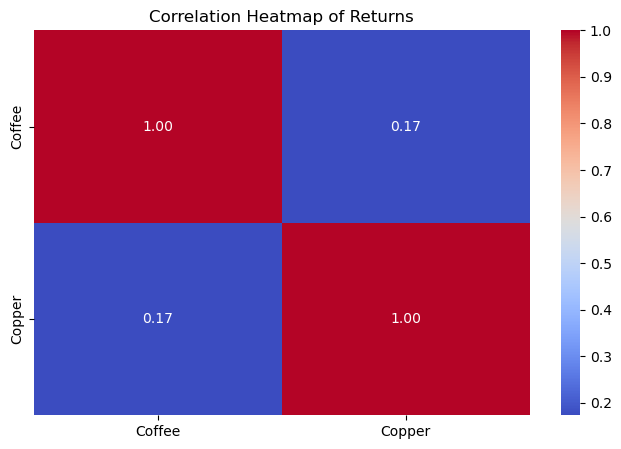

In [64]:
# Plot Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Returns")
plt.show()


In [65]:
# Check Stationarity with ADF Test
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series.dropna())
    print(f"ADF Test for {series.name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] < 0.05:
        print("The series is stationary.\n")
    else:
        print("The series is non-stationary. Consider differencing.\n")


In [66]:
# Apply the ADF test to each numeric column
for col in df.select_dtypes(include=['number']).columns:
    adf_test(df[col])


ADF Test for Coffee:
ADF Statistic: -1.1748818600236337
p-value: 0.6843065133611401
Critical Values:
   1%: -3.4329517425474014
   5%: -2.862689439250822
   10%: -2.5673818904827863
The series is non-stationary. Consider differencing.

ADF Test for Copper:
ADF Statistic: 1.7065883207585693
p-value: 0.998144583086764
Critical Values:
   1%: -3.4329579682301254
   5%: -2.8626921885291017
   10%: -2.5673833542324727
The series is non-stationary. Consider differencing.



In [67]:
# Apply ADF Test to Both Commodities
for column in df.columns:
    adf_test(df[column])

ADF Test for Date:
ADF Statistic: 4.104647361723035
p-value: 1.0
Critical Values:
   1%: -3.4329799947351503
   5%: -2.862701915447137
   10%: -2.5673885329713495
The series is non-stationary. Consider differencing.

ADF Test for Coffee:
ADF Statistic: -1.1748818600236337
p-value: 0.6843065133611401
Critical Values:
   1%: -3.4329517425474014
   5%: -2.862689439250822
   10%: -2.5673818904827863
The series is non-stationary. Consider differencing.

ADF Test for Copper:
ADF Statistic: 1.7065883207585693
p-value: 0.998144583086764
Critical Values:
   1%: -3.4329579682301254
   5%: -2.8626921885291017
   10%: -2.5673833542324727
The series is non-stationary. Consider differencing.



<Figure size 1200x800 with 0 Axes>

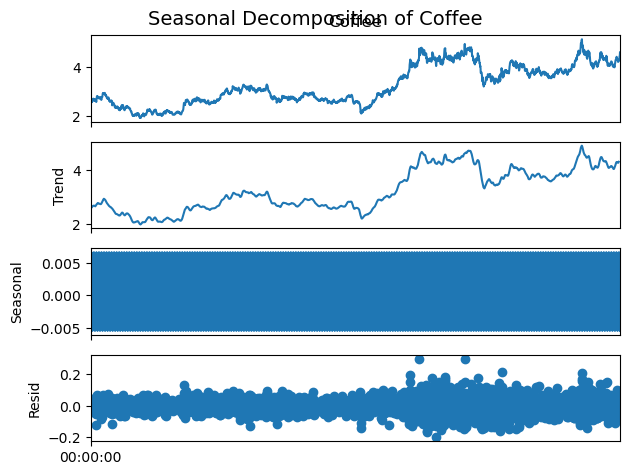

<Figure size 1200x800 with 0 Axes>

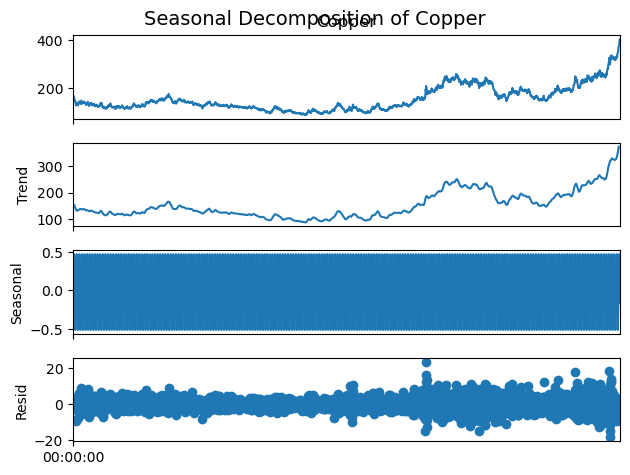

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform Seasonal Decomposition
for column in df.select_dtypes(include=['number']).columns: 
    decomposition = seasonal_decompose(df[column].dropna(), model='additive', period=12)
    
    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.suptitle(f"Seasonal Decomposition of {column}", fontsize=14)
    plt.show()


### Exploring using Hidden Markov Models

In [75]:
# Compute log returns (to make the data more stationary)
df['Coffee_returns'] = np.log(df['Coffee'] / df['Coffee'].shift(1))
df['Copper_returns'] = np.log(df['Copper'] / df['Copper'].shift(1))

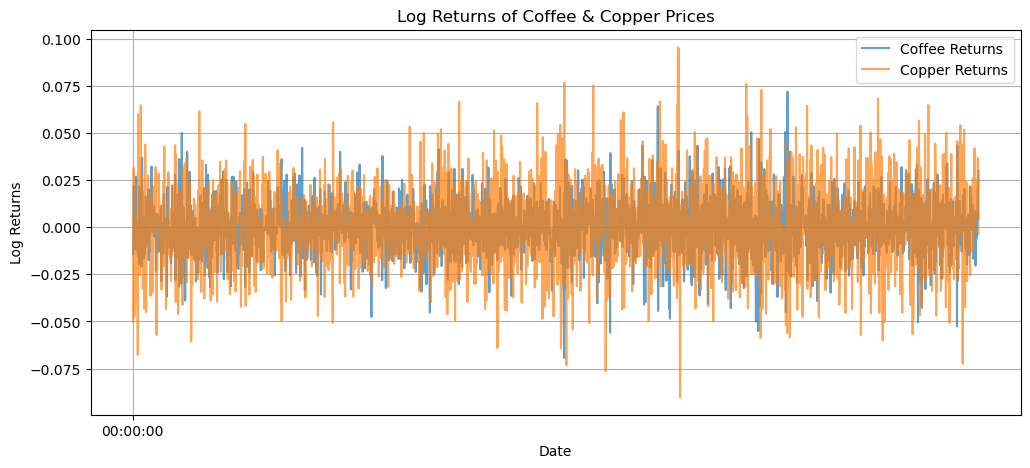

In [76]:
# Drop NaN values
df.dropna(inplace=True)

# Visualizing Log Returns
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Coffee_returns'], label='Coffee Returns', alpha=0.7)
plt.plot(df.index, df['Copper_returns'], label='Copper Returns', alpha=0.7)
plt.legend()
plt.title("Log Returns of Coffee & Copper Prices")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.grid(True)
plt.show()

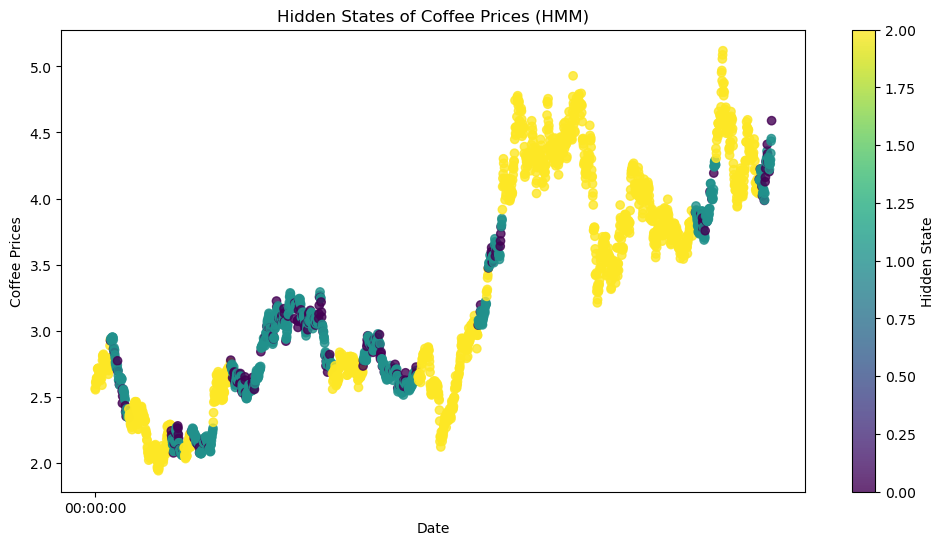

In [80]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from hmmlearn.hmm import GaussianHMM

# Prepare features (log returns of Coffee and Copper)
features = df[['Coffee_returns', 'Copper_returns']].values

# Standardize data (HMM performs better with scaled data)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fit HMM model
num_states = 3  # Define number of hidden states (e.g., Bull, Bear, Neutral)
hmm_model = GaussianHMM(n_components=num_states, covariance_type="full", n_iter=1000, random_state=42)
hmm_model.fit(features_scaled)

# Predict hidden states
hidden_states = hmm_model.predict(features_scaled)

# Add hidden states to DataFrame
df['Hidden_State'] = hidden_states

# Plot hidden states over time
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Coffee'], c=df['Hidden_State'], cmap='viridis', alpha=0.8)
plt.title("Hidden States of Coffee Prices (HMM)")
plt.xlabel("Date")
plt.ylabel("Coffee Prices")
plt.colorbar(label="Hidden State")
plt.show()


In [81]:
# Predict the next likely state based on the latest observation
latest_observation = features_scaled[-1].reshape(1, -1)
predicted_state = hmm_model.predict(latest_observation)
print(f"Predicted next state: {predicted_state[0]}")


Predicted next state: 2


In [82]:
# Count the frequency of each hidden state
print(df['Hidden_State'].value_counts())

# Compute summary statistics per hidden state
state_summary = df.groupby('Hidden_State')[['Coffee_returns', 'Copper_returns']].describe()
print(state_summary)


Hidden_State
2    1530
1     784
0     202
Name: count, dtype: int64
             Coffee_returns                                                    \
                      count      mean       std       min       25%       50%   
Hidden_State                                                                    
0                     202.0 -0.001543  0.019710 -0.047640 -0.016648 -0.008297   
1                     784.0  0.000453  0.006913 -0.021758 -0.004534  0.000481   
2                    1530.0  0.000343  0.015500 -0.069286 -0.009345  0.000175   

                                 Copper_returns                                \
                   75%       max          count      mean       std       min   
Hidden_State                                                                    
0             0.017351  0.040045          202.0 -0.003603  0.010014 -0.033156   
1             0.005460  0.022092          784.0  0.001461  0.017903 -0.064002   
2             0.010079  0.071988       

### Forecasting 

#### 1. Forecasting with Prophet

In [94]:
from prophet import Prophet

coffee_df = df[['Coffee']].reset_index().rename(columns={'Date': 'ds', 'Coffee': 'y'})

# Initialize and fit the Prophet model
coffee_model = Prophet()

coffee_model.fit(coffee_df)
future_coffee = coffee_model.make_future_dataframe(periods=12, freq='M')

forecast_coffee = coffee_model.predict(future_coffee)

# Plot the forecast
coffee_model.plot(forecast_coffee)
plt.title("Coffee Price Forecast (Prophet)")
plt.show()

print(forecast_coffee[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))



ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

#### 2. Forecasting with ARIMA

In [ ]:
p, d, q = 1, 1, 1  # Adjust based on ACF/PACF plots
arima_model = ARIMA(df['Coffee'], order=(p, d, q))
arima_fit = arima_model.fit()

# Forecast for next 12 months
forecast_arima = arima_fit.forecast(steps=12)
forecast_dates = pd.date_range(start=df.index[-1], periods=12, freq='M')

# Convert to DataFrame
forecast_arima_df = pd.DataFrame({'ds': forecast_dates, 'yhat': forecast_arima})

# Plot ARIMA Forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Coffee'], label="Actual Coffee Prices")
plt.plot(forecast_arima_df['ds'], forecast_arima_df['yhat'], label="ARIMA Forecast", linestyle='dashed')
plt.legend()
plt.title("Coffee Price Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()


#### 3. Model Comparison (MAE and RMSE)

In [ ]:
# Select actual values for comparison
actual = df['Coffee'][-12:]

# Prophet Errors
prophet_forecast = forecast_coffee[['ds', 'yhat']].set_index('ds').loc[actual.index]
mae_prophet = mean_absolute_error(actual, prophet_forecast['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(actual, prophet_forecast['yhat']))

# ARIMA Errors
arima_forecast = forecast_arima_df.set_index('ds').loc[actual.index]
mae_arima = mean_absolute_error(actual, arima_forecast['yhat'])
rmse_arima = np.sqrt(mean_squared_error(actual, arima_forecast['yhat']))

# Print Results
print(f"Prophet - MAE: {mae_prophet:.4f}, RMSE: {rmse_prophet:.4f}")
print(f"ARIMA - MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}")


From the chart above, we can see a similar trend in Coffee and Copper. We therefore foresee ETF also performing better on this trajectory.

We therefore move to fore